In [631]:
import pandas as pd
df = pd.read_csv('wdbc.data', sep=',', header = None) # Đọc file wine.csv

In [632]:
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [633]:
import random

def shuffleData(features, labels):
    combined = list(zip(features, labels))
    random.shuffle(combined)
    featureShuffled, labelsShuffled = zip(*combined)
    
    return list(featureShuffled), list(labelsShuffled)

In [634]:
def getSubsets(features, labels, size = 0.4):
    featureShuffled, labelsShuffled = shuffleData(features, labels)
    
    featureLen = int(len(features) * size)
    
    featureTrain = featureShuffled[:featureLen]
    labelTrain = labelsShuffled[:featureLen]
    featureTest = featureShuffled[featureLen:]
    labelTest = labelsShuffled[featureLen:]
    
    return featureTrain, featureTest, labelTrain, labelTest


In [635]:
feature = df.iloc[:, 2:32].values
label = df.iloc[:, 1].values

In [636]:
import matplotlib.pyplot as plt # type: ignore

In [637]:
def drawScatterCharts(origin, train, test):
    labels1 = ['M', 'B']
    labels2 = ['Train', 'Test']
    
    numM1 = sum(1 for cur in origin if cur == 'M')
    numM2 = sum(1 for cur in train if cur == 'M')
    numM3 = sum(1 for cur in test if cur == 'M')
    
    s1 = round(numM1 / len(origin) * 100, 3)
    s2 = round(numM2 / len(train) * 100, 3)
    s3 = round(numM3 / len(test) * 100, 3)
    s4 = round(len(train) / (len(train) + len(test)) * 100, 3)
    
    sizeS1 = [s1, 100 - s1]
    sizeS2 = [s2, 100 - s2]
    sizeS3 = [s3, 100 - s3]
    sizeS4 = [s4, 100 - s4]

    _, chart = plt.subplots(1, 4, figsize=(12, 4))

    wedges1, _, _ = chart[0].pie(sizeS1, labels=labels1, autopct='%1.3f%%', startangle=140, colors = ['#FF7F0E', '#1F77B4'])
    chart[0].axis('equal')
    chart[0].set_title('Original dataset', pad=5, loc='center')
    
    wedges1, _, _ = chart[1].pie(sizeS2, labels=labels1, autopct='%1.3f%%', startangle=140, colors = ['#FF7F0E', '#1F77B4'])
    chart[1].axis('equal')
    chart[1].set_title('Train dataset', pad=5, loc='center')
    
    wedges1, _, _ = chart[2].pie(sizeS3, labels=labels1, autopct='%1.3f%%', startangle=140, colors = ['#FF7F0E', '#1F77B4'])
    chart[2].axis('equal')
    chart[2].set_title('Test dataset', pad=5, loc='center')
    
    wedges2, _, _ = chart[3].pie(sizeS4, labels=labels2, autopct='%1.3f%%', startangle=140, colors = ['#B9CB09', '#1EB630'])
    chart[3].axis('equal')
    chart[3].set_title('Train vs Test in Original set', pad=5, loc='center')
    
    wedges1 += wedges2
    labels1 = ['Malignant', 'Benign']
    labels1 += labels2

    plt.legend(wedges1, labels1, title="Annotation", loc="center left", bbox_to_anchor=(1.2, 0.5))
    plt.subplots_adjust(top=0.85, bottom=0.2)
    plt.show()

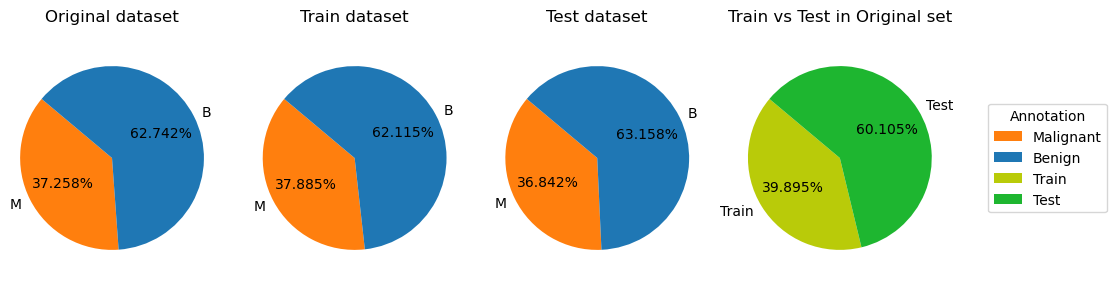

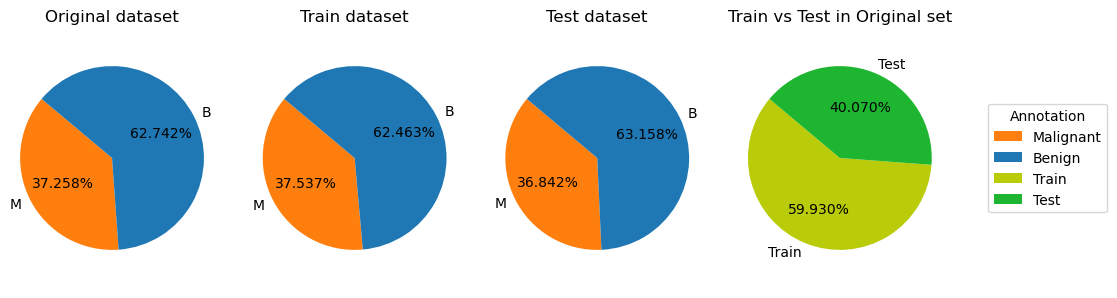

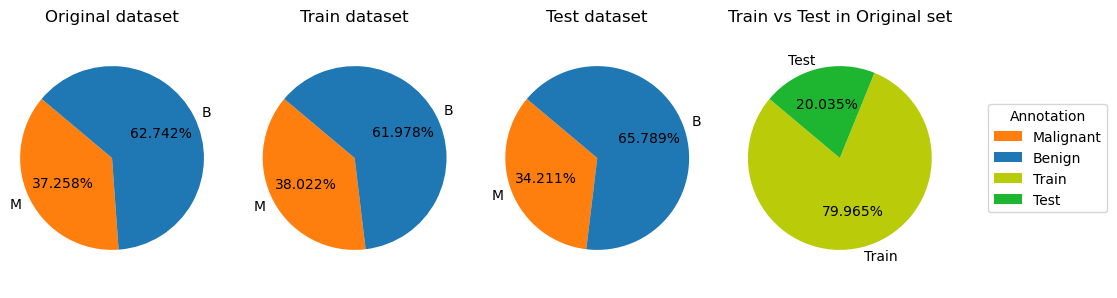

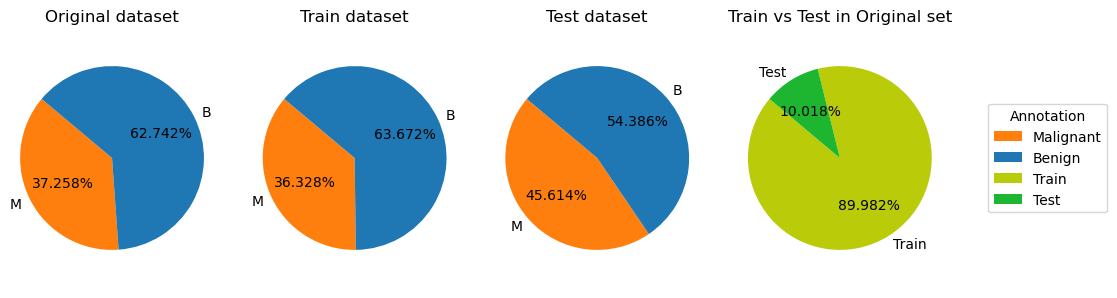

In [638]:
f1Train, f1Test, l1Train, l1Test = getSubsets(feature, label, 0.4)
drawScatterCharts(df[1].tolist(), l1Train, l1Test)
f2Train, f2Test, l2Train, l2Test = getSubsets(feature, label, 0.6)
drawScatterCharts(df[1].tolist(), l2Train, l2Test)
f3Train, f3Test, l3Train, l3Test = getSubsets(feature, label, 0.8)
drawScatterCharts(df[1].tolist(), l3Train, l3Test)
f4Train, f4Test, l4Train, l4Test = getSubsets(feature, label, 0.9)
drawScatterCharts(df[1].tolist(), l4Train, l4Test)

In [639]:
import graphviz

In [640]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(f1Train, l1Train)

from sklearn import tree
import graphviz 

# Xuất cây quyết định dưới dạng dữ liệu graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                # feature_names=feature_names,  
                                # class_names=['Malignant', 'Benign'],  
                                filled=True, rounded=True,  
                                special_characters=True)  

# Tạo biểu đồ từ dữ liệu graphviz
graph = graphviz.Source(dot_data)
graph.view()

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH